## Cel analizy

Celem tej analizy było sprawdzenie, **które cechy fizyczne kwiatów Iris** 
pozwalają najlepiej rozróżnić trzy gatunki:

- *Iris setosa*
- *Iris versicolor*
- *Iris virginica*

Dataset zawiera **150 obserwacji** oraz **4 zmienne opisujące kształt kwiatu**:

| Cecha | Opis |
|---|---|
| Sepal length | Długość kielicha |
| Sepal width  | Szerokość kielicha |
| Petal length | Długość płatka |
| Petal width  | Szerokość płatka |

Badanie miało na celu **zrozumienie różnic między gatunkami** oraz ocenę, 
czy dane są stabilne i mogą zostać wykorzystane do modelowania.

In [1]:
# Podstawy
import pandas as pd
import numpy as np

# Wykresy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Dane Iris
from sklearn.datasets import load_iris

# Ustawienia wizualne i czytelność
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11
pd.set_option("display.precision", 3)
pd.set_option("display.max_columns", 10)

# Reproducible
SEED = 42
np.random.seed(SEED)


In [2]:
# Standaryzacja / PCA (np. do wizualizacji separowalności na 2D)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Podział, gdybyś chciał dorzucić krótki model / walidację
from sklearn.model_selection import train_test_split


### 🌸 Iris Setosa — najmniejsze płatki

**Setosa wyróżnia się najmniejszymi płatkami** — to najbardziej kompaktowy gatunek irysa, 
szczególnie pod względem **długości i szerokości płatka**.

Ta cecha powoduje, że *setosa* wyraźnie odróżnia się od pozostałych dwóch gatunków.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

# surowy DF
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# kolumna z klasą w PL
df["klasa (class)"] = pd.Categorical.from_codes(
    iris.target, ["setosa", "versicolor", "virginica"]
)

# zmiana nazw kolumn na te, których używasz w wykresie
df = df.rename(columns={
    "petal length (cm)": "długość płatka (petal length)",
    "petal width (cm)":  "szerokość płatka (petal width)",
    "sepal length (cm)": "długość kielicha (sepal length)",
    "sepal width (cm)":  "szerokość kielicha (sepal width)",
})


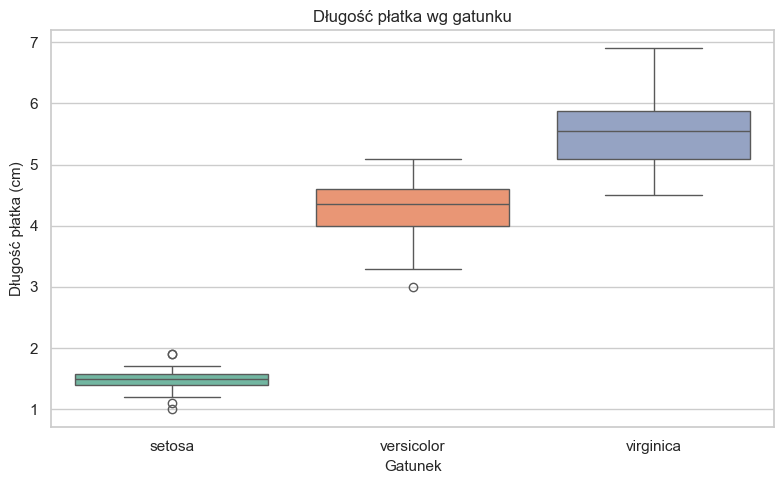

In [5]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
    ax = sns.boxplot(
        data=df,
        x="klasa (class)",                    # było "species"
        y="długość płatka (petal length)",    # było "petal length (cm)"
        hue="klasa (class)",                  # dodane, by nie było warningu o palette
        palette="Set2",
        dodge=False
    )

# usuń legendę (bo x==hue)
if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.title("Długość płatka wg gatunku")
plt.xlabel("Gatunek")
plt.ylabel("Długość płatka (cm)")
plt.tight_layout()
plt.show()


![Iris setosa](assets/iris_setosa.png)

### 🌿 Iris Versicolor — cechy pośrednie

**Versicolor zajmuje pozycję pośrednią** między setosą a viriginicą pod względem rozmiaru płatków.

Widzimy, że:
- płatki są **większe niż u setosy**,
- ale **mniejsze niż u virginiki**,
- wartości układają się **wzdłuż przejścia** pomiędzy pozostałymi gatunkami.

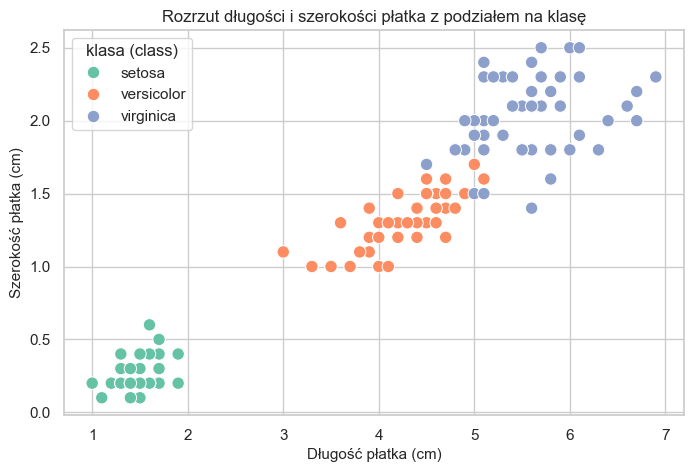

In [6]:
# jednorazowo po wczytaniu danych
rename = {
    "sepal length (cm)": "długość kielicha (sepal length)",
    "sepal width (cm)":  "szerokość kielicha (sepal width)",
    "petal length (cm)": "długość płatka (petal length)",
    "petal width (cm)":  "szerokość płatka (petal width)",
    "species":           "klasa (class)"
}
df = df.rename(columns=rename)

# teraz Twój wykres zadziała:
sns.scatterplot(
    data=df,
    x="długość płatka (petal length)",
    y="szerokość płatka (petal width)",
    hue="klasa (class)",
    palette="Set2",
    s=80
)
plt.title("Rozrzut długości i szerokości płatka z podziałem na klasę")
plt.xlabel("Długość płatka (cm)")
plt.ylabel("Szerokość płatka (cm)")
plt.show()


![Iris versicolor](assets/iris_versicolor.png)


### 🌺 Iris Virginica — największe płatki

**Virginica** ma **największe płatki** (długość i szerokość), co mocno odróżnia ją od pozostałych gatunków.

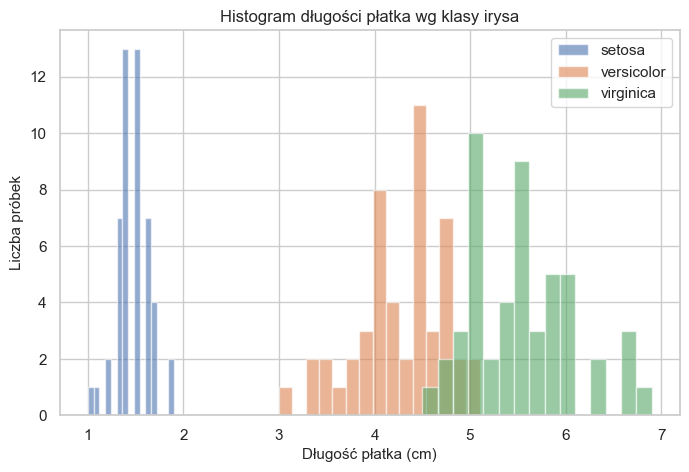

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

for gatunek in df["klasa (class)"].unique():
    podzbiór = df[df["klasa (class)"] == gatunek]
    plt.hist(
        podzbiór["długość płatka (petal length)"],
        bins=15,
        alpha=0.6,
        label=gatunek
    )

plt.title("Histogram długości płatka wg klasy irysa")
plt.xlabel("Długość płatka (cm)")
plt.ylabel("Liczba próbek")
plt.legend()
plt.show()



![Iris virginica](assets/iris_virginica.png)

## Najważniejsze wnioski z analizy

### 🌸 Różnice między gatunkami

- **Setosa** wyróżnia się najmniejszymi płatkami (petal length, petal width)
- **Virginica** ma największe płatki — szczególnie szerokość płatka
- **Versicolor** zajmuje pozycję pośrednią między pozostałymi dwoma gatunkami

Te cechy pozwalają **wyraźnie oddzielić gatunki** w przestrzeni cech.


In [8]:
# Średnie cech dla każdego gatunku
numbers_df = (
    df.groupby("klasa (class)")[
        ["długość płatka (petal length)",
         "szerokość płatka (petal width)",
         "długość kielicha (sepal length)"]
    ].mean()
    .rename(columns={
        "długość płatka (petal length)":  "Śr. dł. płatka",
        "szerokość płatka (petal width)": "Śr. szer. płatka",
        "długość kielicha (sepal length)":"Śr. dł. kielicha"
    })
).round(2)

numbers_df  # podgląd


C:\Users\baxiu\AppData\Local\Temp\ipykernel_24464\2671033976.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("klasa (class)")[


,Śr. dł. płatka,Śr. szer. płatka,Śr. dł. kielicha
klasa (class),,,
setosa,1.46,0.25,5.01
versicolor,4.26,1.33,5.94
virginica,5.55,2.03,6.59


In [11]:
styler = (
    numbers_df.style
      .bar(subset=["Śr. dł. płatka"],  color="#ef4444", align="left")
      .bar(subset=["Śr. szer. płatka"], color="#22c55e", align="left")
      .bar(subset=["Śr. dł. kielicha"], color="#3b82f6", align="left")
      .highlight_max(subset=numbers_df.columns, color="#fff3b0")  # żółty marker na max
      .set_properties(subset=numbers_df.columns, **{"font-weight": "600"})
)

styler  # ważne: Styler jako OSTATNIA linia komórki, żeby się wyrenderował


,Śr. dł. płatka,Śr. szer. płatka,Śr. dł. kielicha
klasa (class),,,
setosa,1.460000,0.250000,5.010000
versicolor,4.260000,1.330000,5.940000
virginica,5.550000,2.030000,6.590000


### 🌱 Czy w danych są wartości odstające?

- W gatunku **setosa** pojawiają się pojedyncze kwiaty o nietypowej szerokości kielicha — jednak mieszczą się one w naturalnej zmienności.
- U **virginica** widać nieco większą różnorodność w szerokości płatków, co może wynikać z bardziej zróżnicowanej budowy tego gatunku.
- Pozostałe cechy są stabilne i układają się w bardzo czytelne wzorce między gatunkami.

✅ Nietypowe wartości są **nieliczne** i wyglądają na **naturalne różnice biologiczne**, a nie błędy pomiarowe.  
**Dane są czyste i nie wymagają dodatkowego przetwarzania przed modelowaniem.**


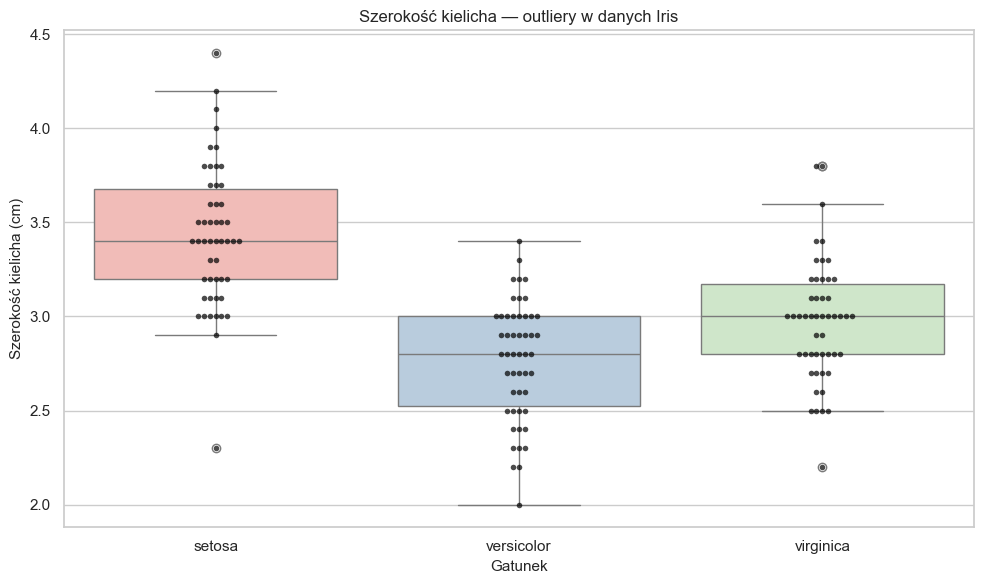

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# (opcjonalnie) stała kolejność klas
order = ["Iris setosa", "Iris versicolor", "Iris virginica"]
order = [c for c in order if c in df["klasa (class)"].unique()] or sorted(df["klasa (class)"].unique())

# paleta jako mapowanie (bez deprec. warningu)
palette = sns.color_palette("Pastel1", n_colors=len(order))
palette_map = dict(zip(order, palette))

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df,
    x="klasa (class)",
    y="szerokość kielicha (sepal width)",
    hue="klasa (class)",        # <— kluczowe
    order=order,
    dodge=False,                # ten sam kolor bez dublowania skrzynek
    palette=palette_map,
    legend=False                # bo hue == x
)

sns.swarmplot(
    data=df,
    x="klasa (class)",
    y="szerokość kielicha (sepal width)",
    order=order,
    color="black",
    size=4,
    alpha=0.7
)

ax.set_title("Szerokość kielicha — outliery w danych Iris")
ax.set_xlabel("Gatunek")
ax.set_ylabel("Szerokość kielicha (cm)")
plt.tight_layout()
plt.show()


### Co wynika z tej analizy?

Dane o irysach pokazują, że **wystarczy kilka prostych pomiarów**, aby z dużą pewnością odróżnić gatunki roślin.  
Różnice są **wyraźne, naturalne biologicznie** i stabilne pomiędzy próbkami.  

To sprawia, że zbiór Iris:
- jest **idealnym przykładem** do nauki klasyfikacji
- świetnie sprawdza się w edukacji i projektach ML
- pozwala zrozumieć, jak cechy wpływają na rozpoznawanie obiektów


### 🎯 Podsumowanie

- płatki → najważniejsza cecha odróżniająca gatunki
- dane są czyste i gotowe do modelowania
- irysy = świetny przykład klasyfikacji w biologii i ML

In [ ]:
!jupyter nbconvert "irysy.ipynb" --to html --no-input --no-prompt \
  --HTMLExporter.embed_images=True --output "irysy_selfcontained.html"

!jupyter nbconvert "irysy.ipynb" --to webpdf --no-input --no-prompt \
  --HTMLExporter.embed_images=True --allow-chromium-download --output "irysy"


In [17]:
!jupyter nbconvert "irysy.ipynb" --to slides --no-input --no-prompt --reveal-prefix="https://unpkg.com/reveal.js@4" --log-level=ERROR --output "irys_final_slide"

